In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/heart.csv")

In [4]:
print(data.head(10))
print(data.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1 

In [5]:
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
num_cols = []
for column in data.columns:
  if((data[column].dtype != 'object') & (data[column].nunique() > 2)):
    num_cols.append(column)

In [8]:
print(num_cols)
print(data.columns)

['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


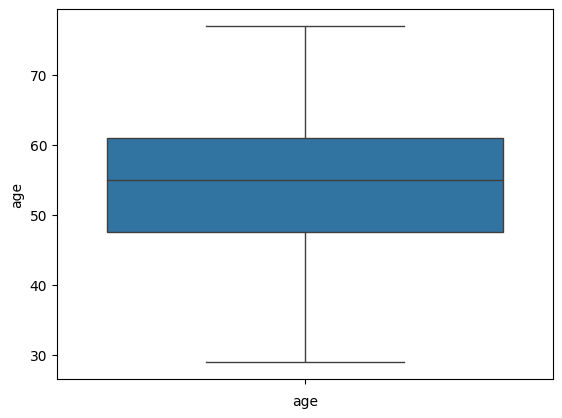

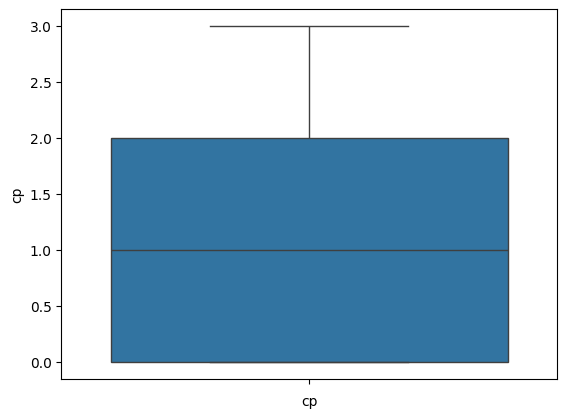

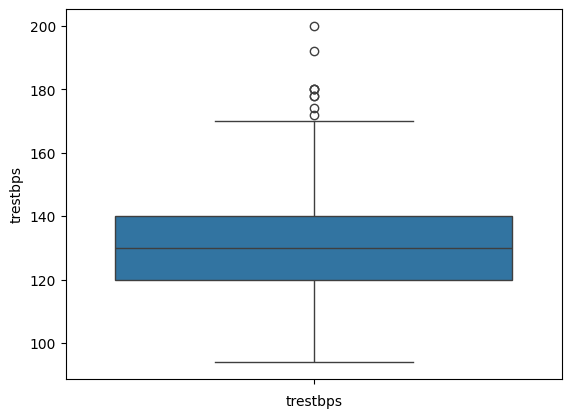

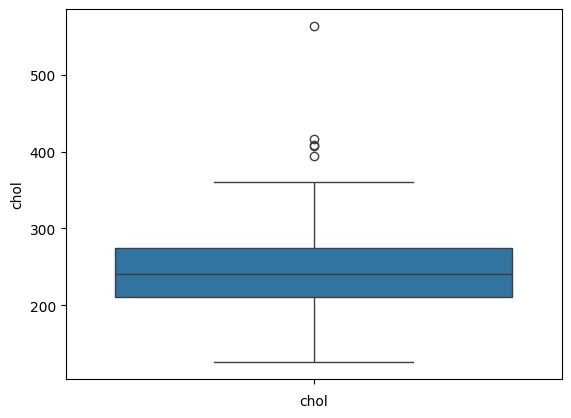

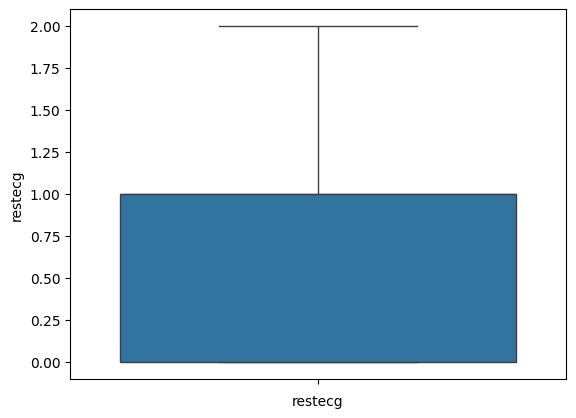

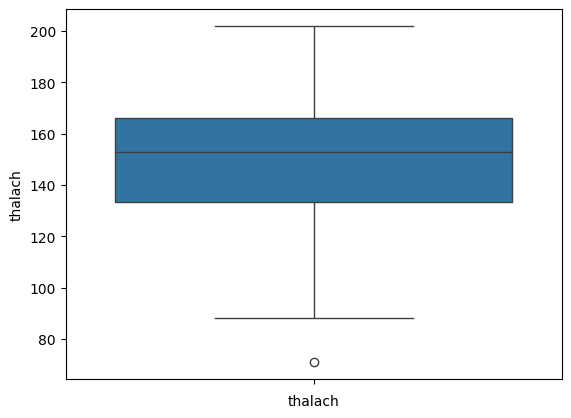

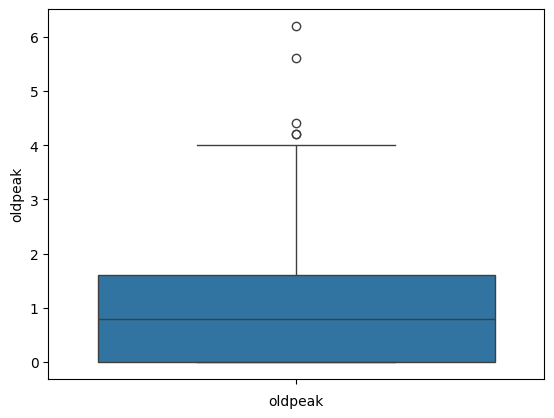

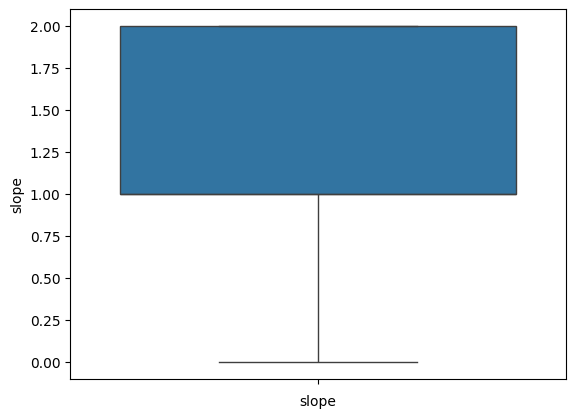

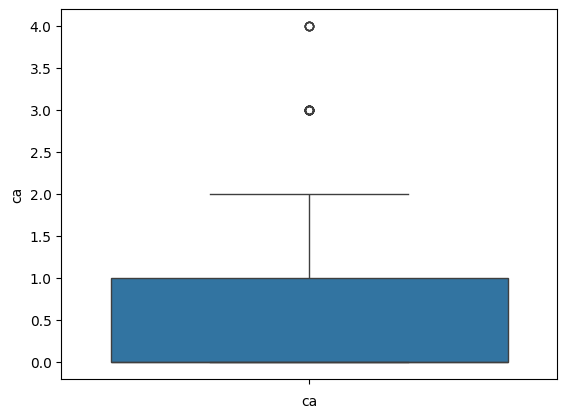

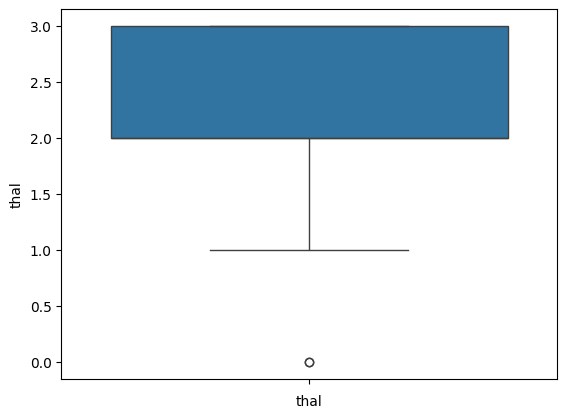

In [9]:
for column in num_cols:
  sns.boxplot(data = data[column])
  plt.xlabel(column)
  plt.show()


In [10]:
for column in num_cols:
  q3, q1 = np.percentile(data[column], [75, 25])
  iqr = q3 - q1
  min_val = q1 - (1.5 * iqr)
  max_val = q3 + (1.5 * iqr)
  data = data[(data[column] > min_val) & (data[column] < max_val)]

In [11]:
data.shape


(256, 14)

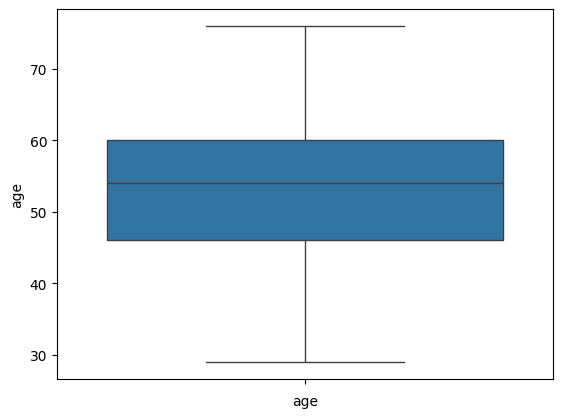

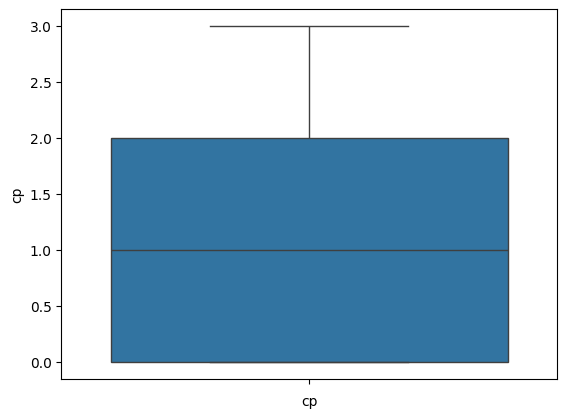

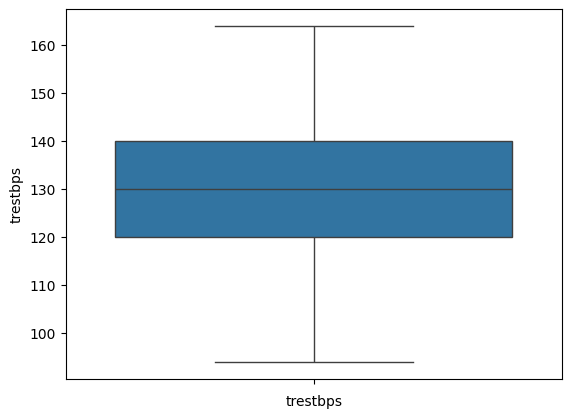

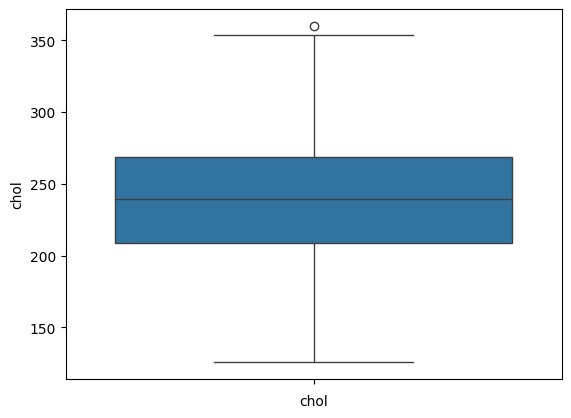

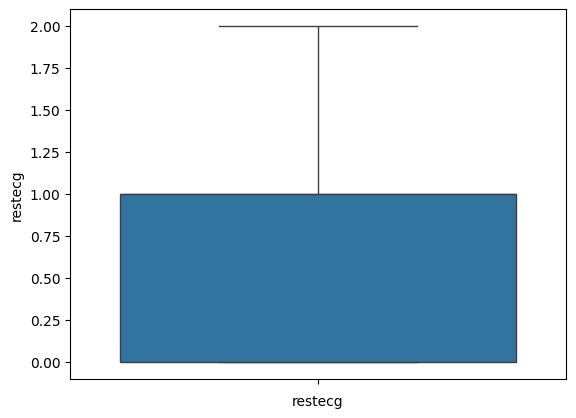

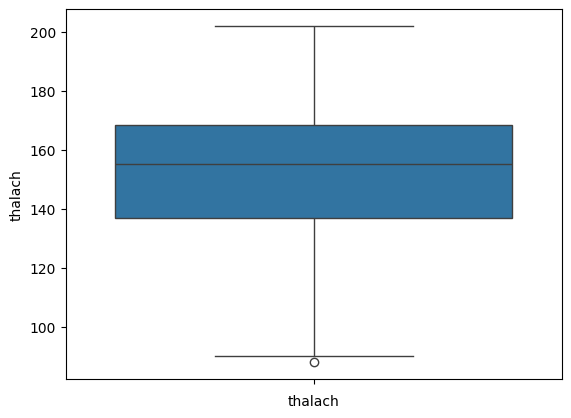

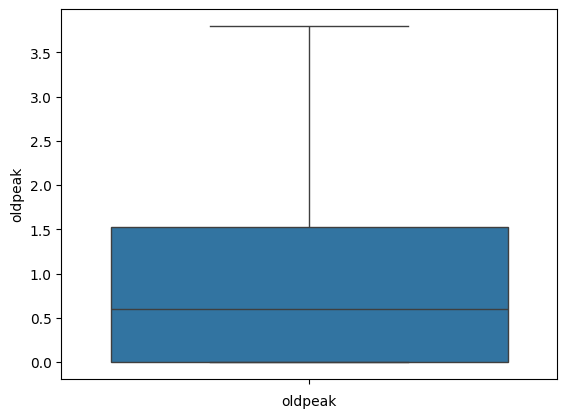

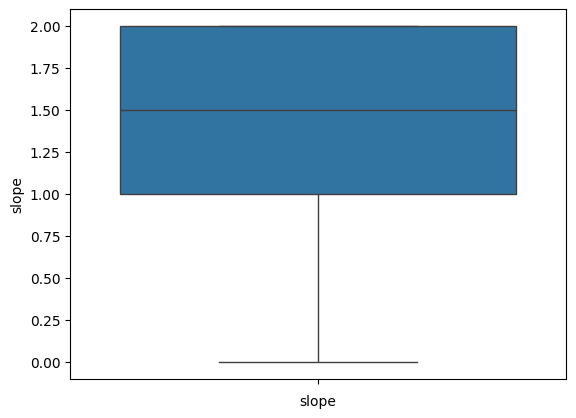

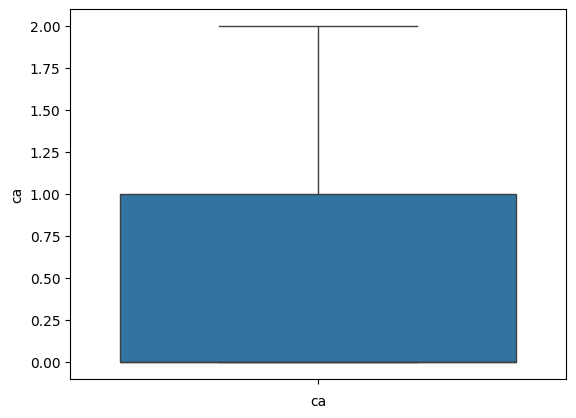

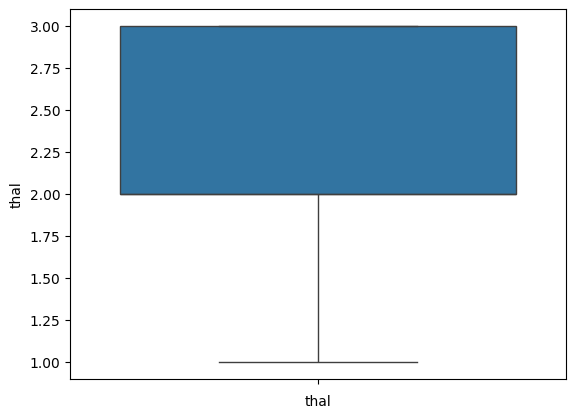

In [12]:
for column in num_cols:
  sns.boxplot(data = data[column], orient= ' h')
  plt.xlabel(column)
  plt.show()

In [13]:
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       256 non-null    int64  
 1   sex       256 non-null    int64  
 2   cp        256 non-null    int64  
 3   trestbps  256 non-null    int64  
 4   chol      256 non-null    int64  
 5   fbs       256 non-null    int64  
 6   restecg   256 non-null    int64  
 7   thalach   256 non-null    int64  
 8   exang     256 non-null    int64  
 9   oldpeak   256 non-null    float64
 10  slope     256 non-null    int64  
 11  ca        256 non-null    int64  
 12  thal      256 non-null    int64  
 13  target    256 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.0 KB
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [14]:
data.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
cat_cols = data.select_dtypes(include = 'object').columns
print(list(cat_cols))

[]


<Axes: >

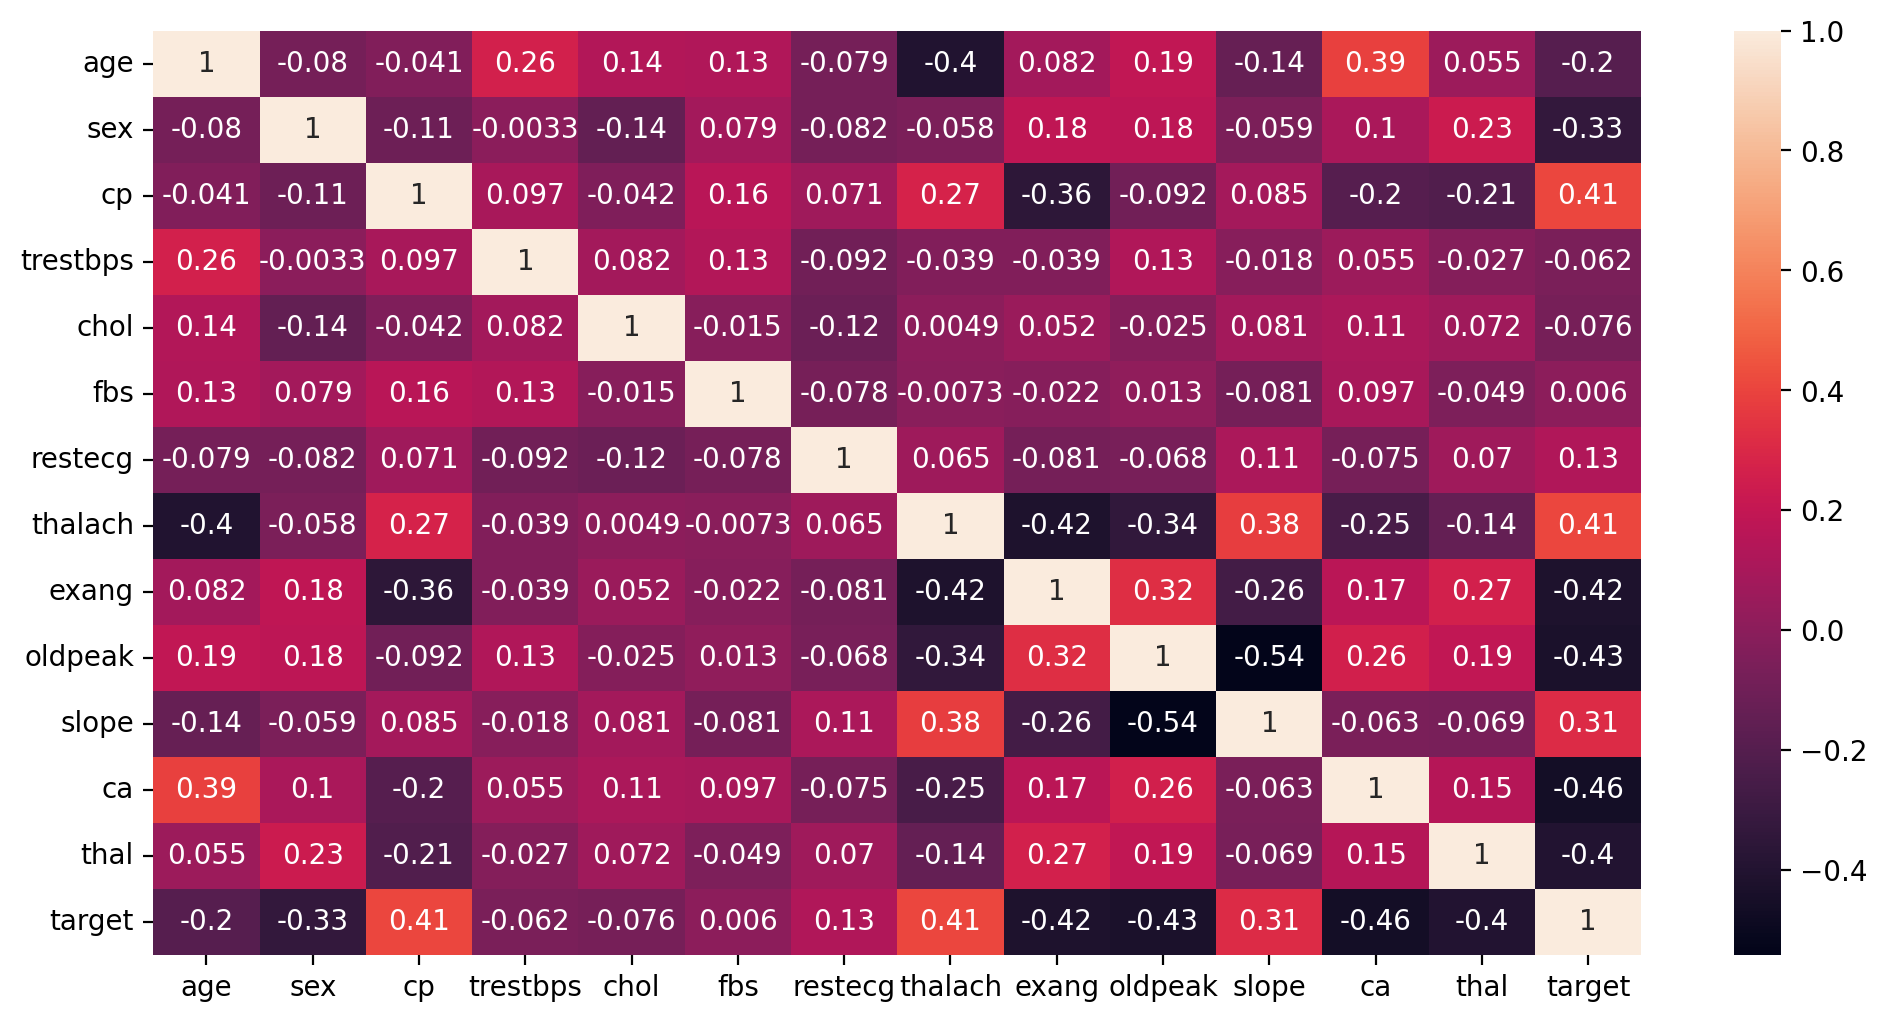

In [16]:
plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(data=data.corr(), annot=True)

In [17]:
# Print the columns in the DataFrame
print(data.columns)

# Check if 'chol' and 'fbs' exist in the DataFrame before dropping them
if 'chol' in data.columns and 'fbs' in data.columns:
    data = data.drop(['chol', 'fbs'], axis=1)

else:
    print("The columns 'chol' or 'fbs' are not present in the DataFrame.")

# Drop the 'HeartDisease' column from the features (X)
if 'target' in data.columns:
    X = data.drop(['target'], axis=1)
    # Target remains the same
    y = data['target']
else:
    print("The column 'target' is not present in the DataFrame.")




Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [18]:
from sklearn.model_selection import train_test_split

# Using X (features) and y (target)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dtreemodel.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.80      0.74      0.77        27

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



In [23]:
modelpredictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
modelpredictions.head(10)

,Actual,Predicted
270,0,0
6,1,1
83,1,0
235,0,1
128,1,1
206,0,0
286,0,0
184,0,0
10,1,1
32,1,1


In [24]:
print('training set score: {:.4f}'.format(dtreemodel.score(x_train, y_train)))
print('test set score: {:.4f}'.format(dtreemodel.score(x_test, y_test)))

training set score: 1.0000
test set score: 0.7692


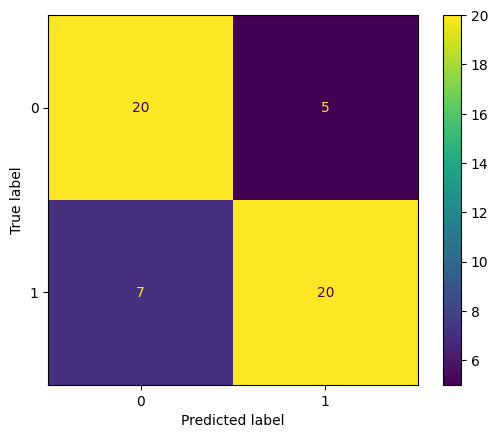

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(dtreemodel, x_test, y_test)
plt.show() # Show the plot


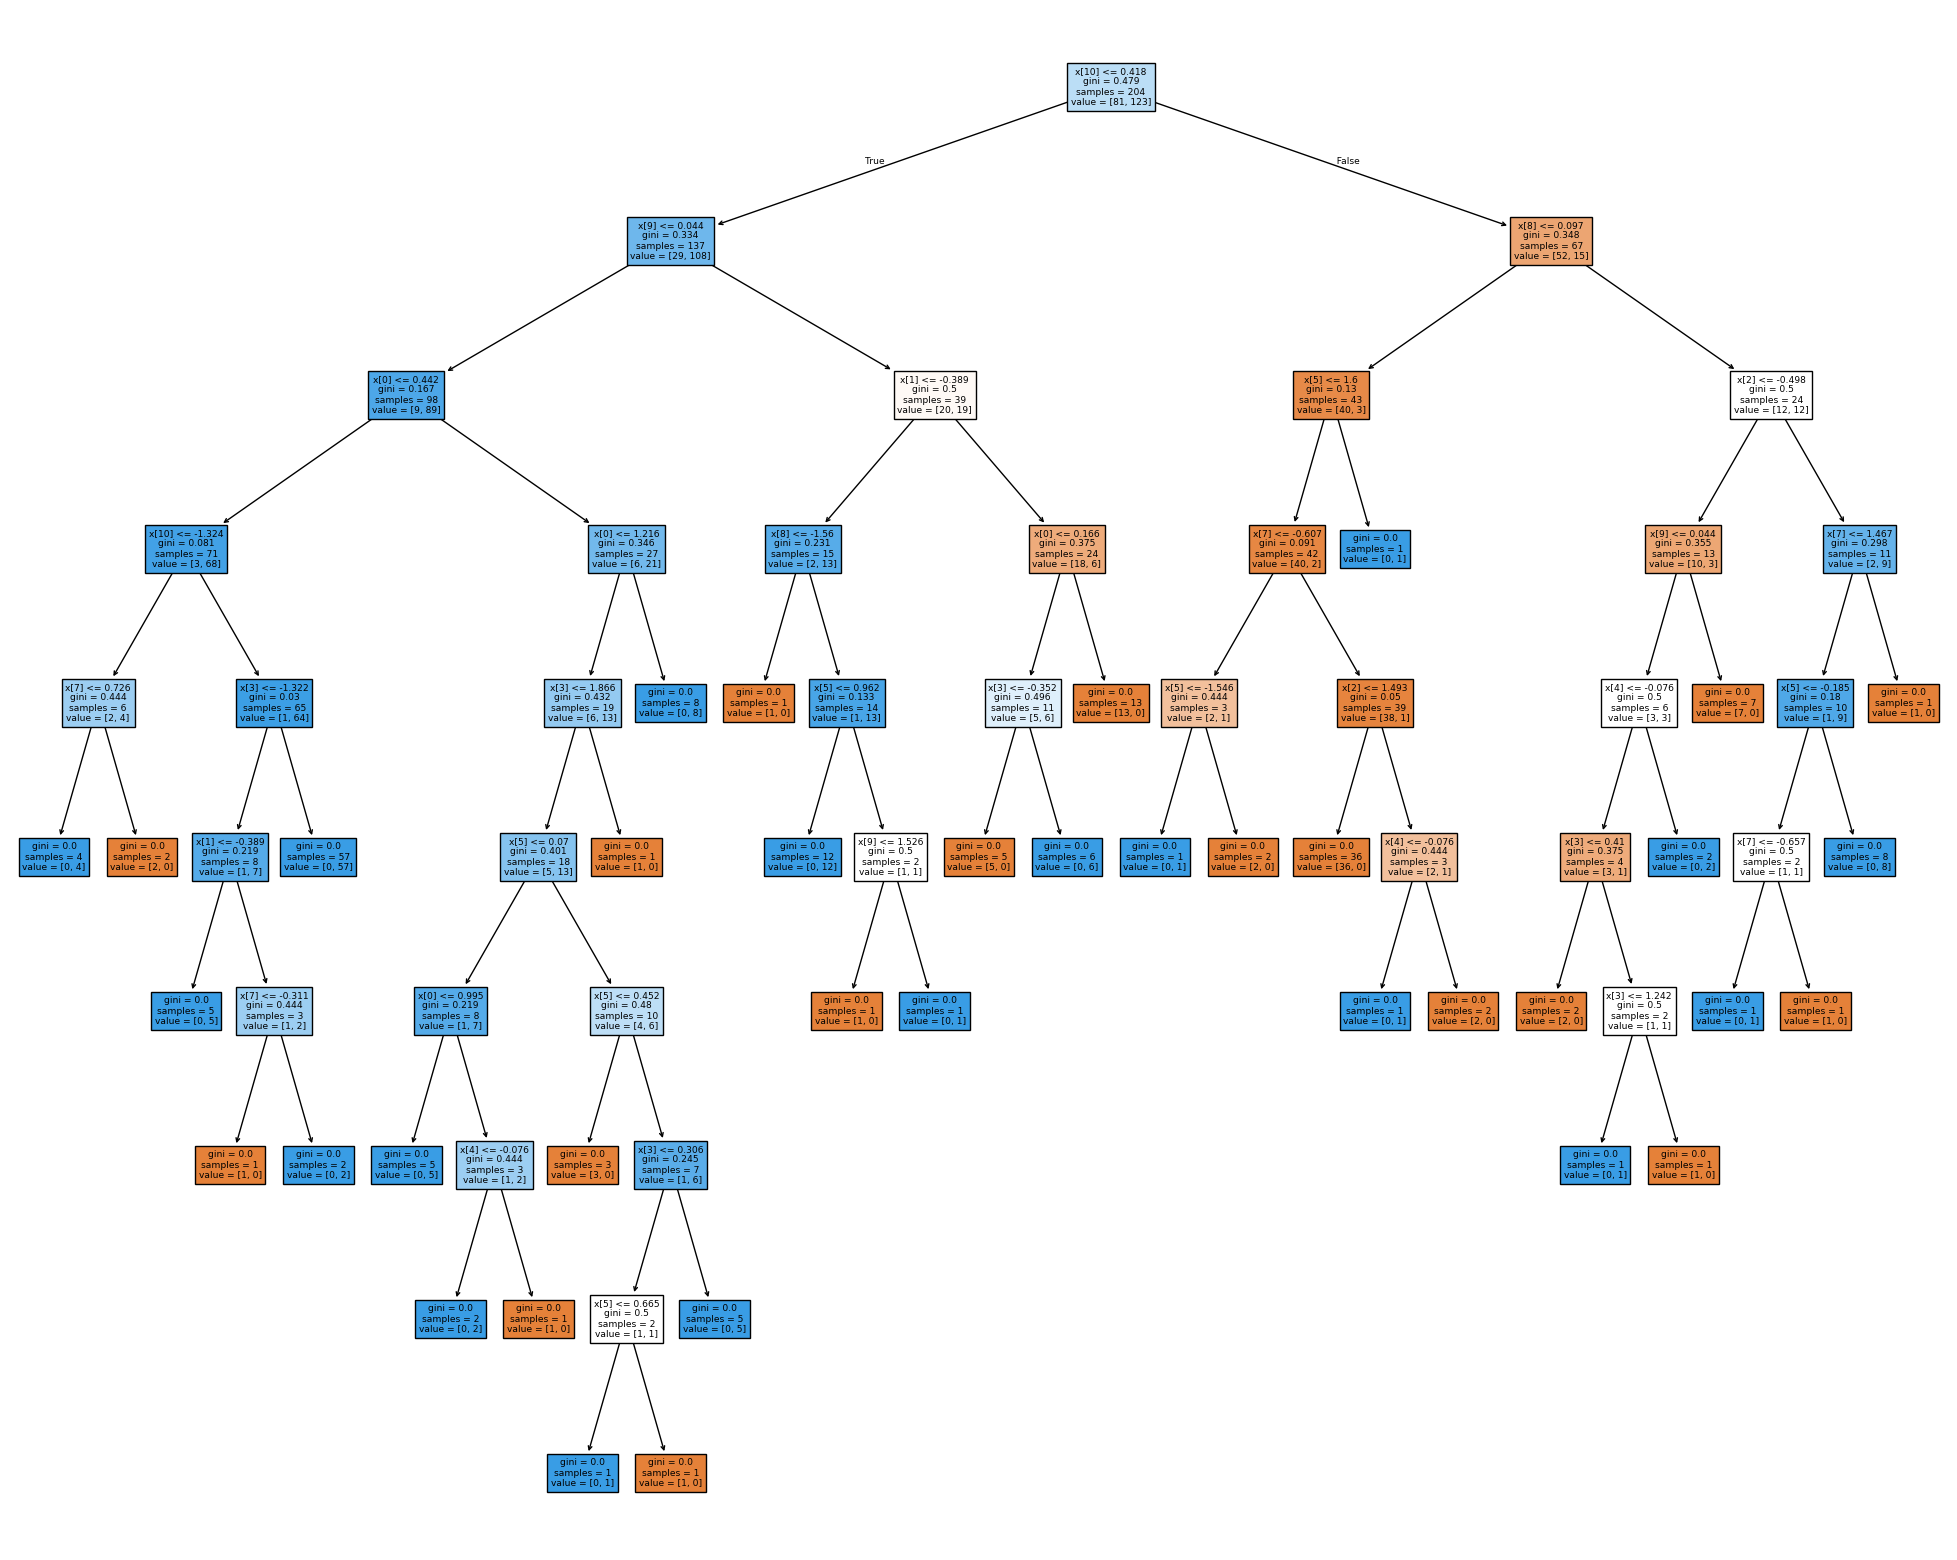

In [26]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(dtreemodel, filled=True)
plt.show()

In [28]:
# **User Input for Prediction**
user_input = {}
for column in X
.columns:
    value = float(input(f"Enter value for {column}: "))
    user_input[column] = value

# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Standardize the user input
user_input_scaled = scaler.transform(user_input_df)

# Make prediction
prediction = dtreemodel.predict(user_input_scaled)
if prediction[0] == 1:
    print("Prediction: The person is likely to have heart disease.")
else:
    print("Prediction: The person is unlikely to have heart disease.")

Enter value for age: 39
Enter value for sex: 1
Enter value for cp: 2
Enter value for trestbps: 266
Enter value for restecg: 0
Enter value for thalach: 145
Enter value for exang: 1
Enter value for oldpeak: 0
Enter value for slope: 0
Enter value for ca: 3
Enter value for thal: 56
Prediction: The person is unlikely to have heart disease.
